In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

    # choose A dataste
    # preprocess the dataset and remove irregularities and null values
    # split the dataset into train and test
    # fit and train the model
    # Evaluate the trained model using test data
    # calculate the necessary metriocs and visualize the data
    y=w^tx+b
    positive class -> w^tx1+b = 1
    negative class -> w^tx2+b = -1
    w^t(x1-x2)=2
    w^t(x1-x2)/||w||=2/||w||
    y1={1, W^t.Xi+b>=1
      ={-1, W^t.Xi+b<=-1
    w`= summ(i=1 to n)ai.Si
    y=wx+b
    

In [21]:
#names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
#'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
#dataset = pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\3. svm\onlinefoods.csv", names=names)
dataset = pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\3. svm\onlinefoods.csv")
dataset

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
dataset.replace('?',1.0, inplace = True)

In [5]:
sns.heatmap(dataset.corr())

ValueError: could not convert string to float: 'Female'

In [6]:
for i in dataset:
    print(i," has these unique values:",dataset[i].unique())

Age  has these unique values: [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Gender  has these unique values: ['Female' 'Male']
Marital Status  has these unique values: ['Single' 'Married' 'Prefer not to say']
Occupation  has these unique values: ['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income  has these unique values: ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications  has these unique values: ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Family size  has these unique values: [4 3 6 2 5 1]
latitude  has these unique values: [12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12.9343 13.0012 12.9442 13.0487 12.9889 12.9335
 13.102  12.9048 12.9337 12.9037 13.0289 12.9561 12.9579 13.014  13.0138
 12.9537 

Text(0.5, 0, 'Unnamed: 12')

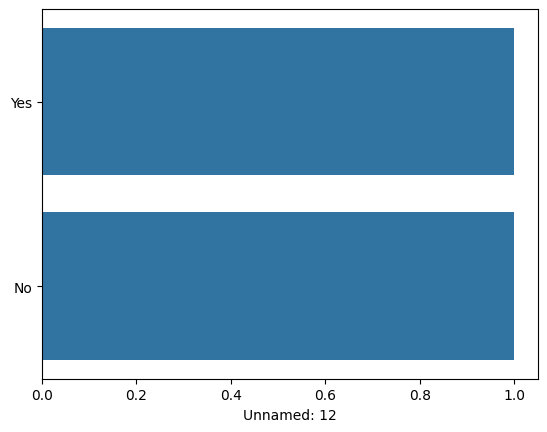

In [7]:
sns.countplot(dataset["Unnamed: 12"].unique())
plt.xlabel("Unnamed: 12")

In [8]:
dataset.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [9]:
dataset.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

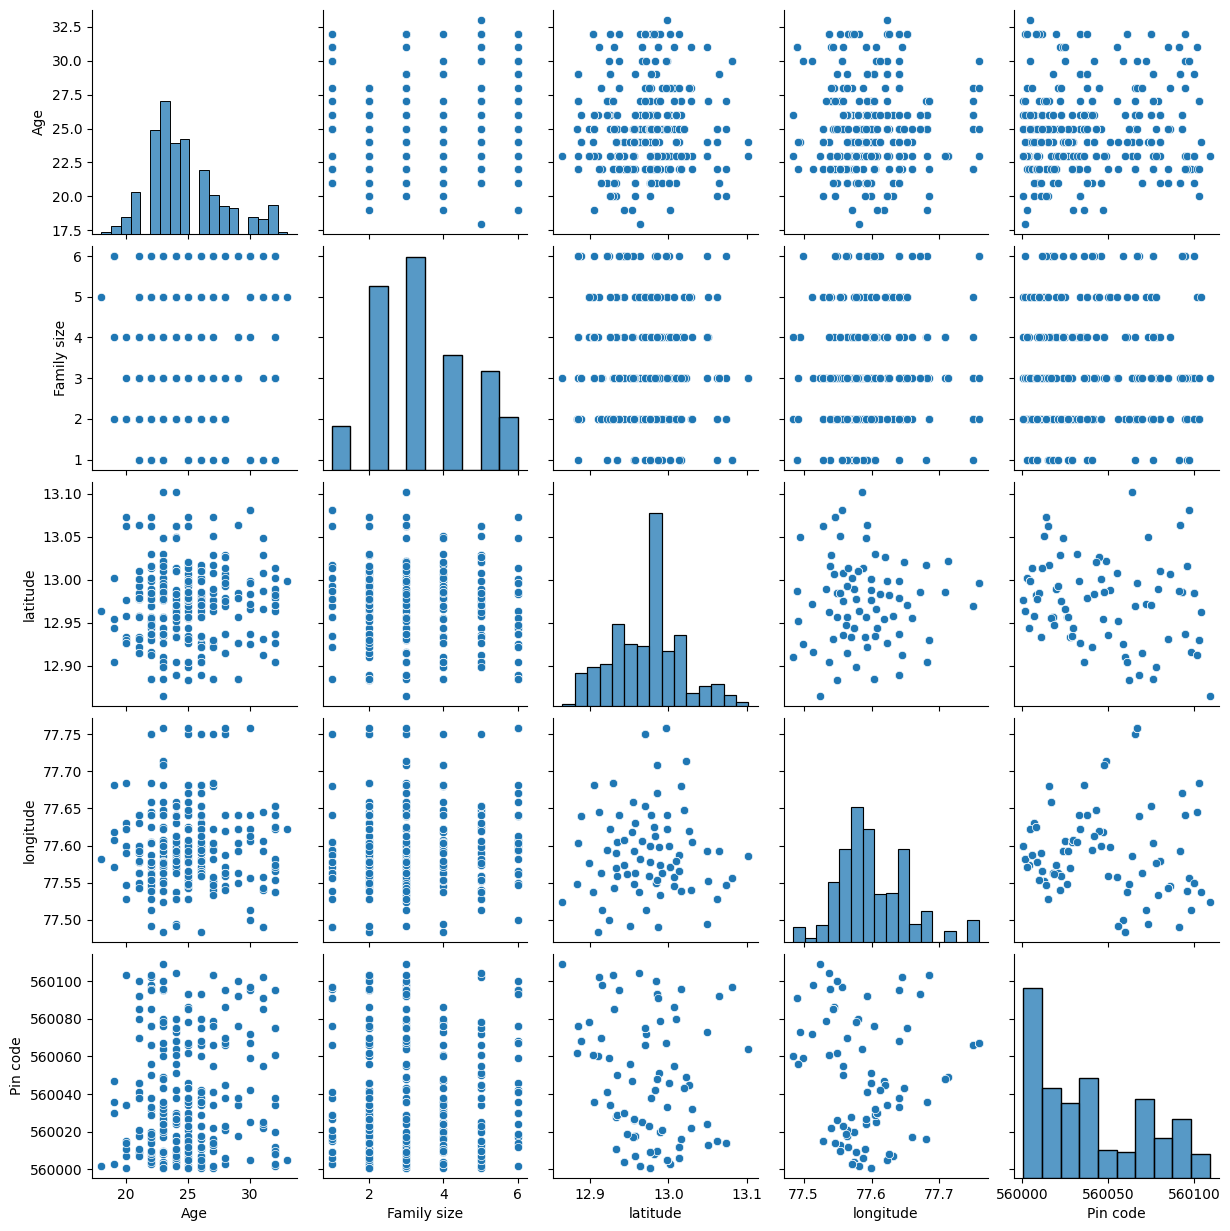

In [10]:
sns.pairplot(dataset)
plt.show()

In [11]:
dataset.fillna(method ='ffill', inplace = True)

C:\Users\23820\AppData\Local\Temp\ipykernel_15036\1594622511.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method ='ffill', inplace = True)


In [25]:
# Encode categorical variables
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Marital Status'] = label_encoder.fit_transform(dataset['Marital Status'])
dataset['Occupation'] = label_encoder.fit_transform(dataset['Occupation'])
dataset['Monthly Income'] = label_encoder.fit_transform(dataset['Monthly Income'])
dataset['Educational Qualifications'] = label_encoder.fit_transform(dataset['Educational Qualifications'])
dataset['Output'] = label_encoder.fit_transform(dataset['Output'])
dataset['Feedback'] = label_encoder.fit_transform(dataset['Feedback'])
# Select only numeric columns for feature scaling
numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()

In [28]:
# Separate features and target variable
#X = dataset.drop('Output', axis=1)
#y = dataset['Output']
# Separate features and target variable
X = dataset[numeric_columns]
y = dataset['Output']

In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)

In [31]:
# Train the SVM Model
svm_model = SVC(kernel='linear', probability=True) # probability=True is needed for roc_auc_score
svm_model.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = svm_model.predict(X_test)

In [32]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[22  0]
 [ 0 95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        95

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



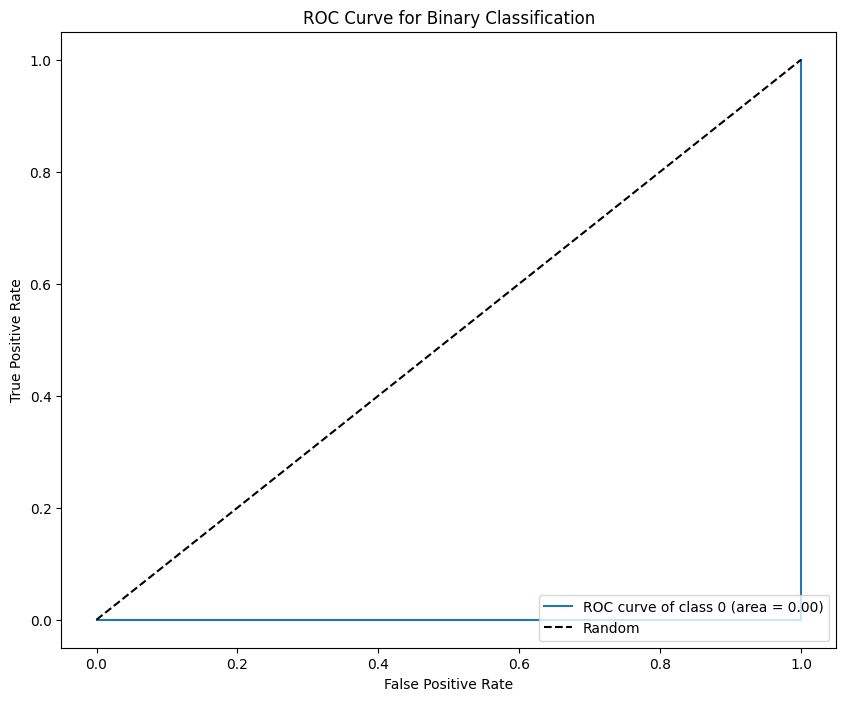

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC curve
y_prob = svm_model.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Assuming you have two classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]  # Get the number of classes dynamically
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()